In [1]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('qt_dataset.csv', encoding='latin-1')

# Hiển thị 5 dòng đầu tiên của dữ liệu
print(data.head())

  ID  Oxygen  PulseRate  Temperature    Result
0  0    98.0       65.0         95.0  Negative
1  1    96.0       92.0         95.0  Negative
2  2    95.0       92.0         99.0  Negative
3  3    97.0       56.0         96.0  Negative
4  4    88.0       94.0         98.0  Positive


In [2]:
# Chuyển đổi cột Temperature từ độ F sang độ C
data['Temperature'] = (data['Temperature'] - 32) * 5/9

# Chuyển đổi cột Result từ dạng text sang dạng số
# Thay thế các giá trị NaN bằng 0 trước khi chuyển đổi kiểu dữ liệu
data['Result'] = data['Result'].map({'Negative': 0, 'Positive': 1}).fillna(0).astype(int)

In [3]:
print(data.head())

  ID  Oxygen  PulseRate  Temperature  Result
0  0    98.0       65.0    35.000000       0
1  1    96.0       92.0    35.000000       0
2  2    95.0       92.0    37.222222       0
3  3    97.0       56.0    35.555556       0
4  4    88.0       94.0    36.666667       1


In [4]:
X = data[['Oxygen', 'PulseRate', 'Temperature']]
Y = data['Result']

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=1)

Epoch 1/150


671/671 [==============================] - 3s 3ms/step - loss: 1.5229 - accuracy: 0.3774 - val_loss: 0.9714 - val_accuracy: 0.5195
Epoch 2/150
671/671 [==============================] - 1s 2ms/step - loss: 0.7716 - accuracy: 0.5004 - val_loss: 0.6462 - val_accuracy: 0.5792
Epoch 3/150
671/671 [==============================] - 2s 2ms/step - loss: 0.5084 - accuracy: 0.7573 - val_loss: 0.4566 - val_accuracy: 0.7825
Epoch 4/150
671/671 [==============================] - 2s 2ms/step - loss: 0.3766 - accuracy: 0.8373 - val_loss: 0.3657 - val_accuracy: 0.8273
Epoch 5/150
671/671 [==============================] - 2s 2ms/step - loss: 0.3232 - accuracy: 0.8581 - val_loss: 0.3200 - val_accuracy: 0.8610
Epoch 6/150
671/671 [==============================] - 2s 2ms/step - loss: 0.3086 - accuracy: 0.8629 - val_loss: 0.3376 - val_accuracy: 0.8364
Epoch 7/150
671/671 [==============================] - 1s 2ms/step - loss: 0.3032 - accuracy: 0.8603 - val_loss: 0.2796 - val_accuracy: 0.87

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


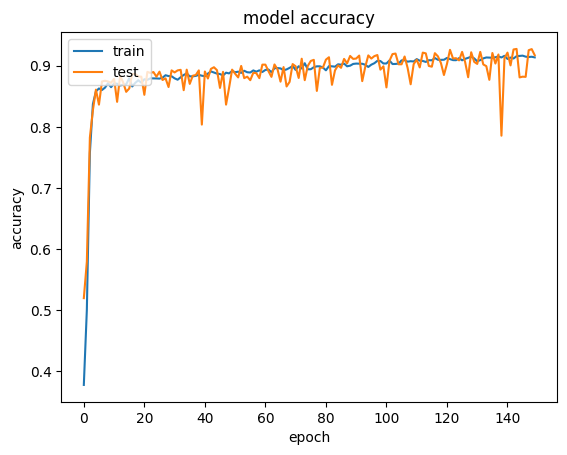

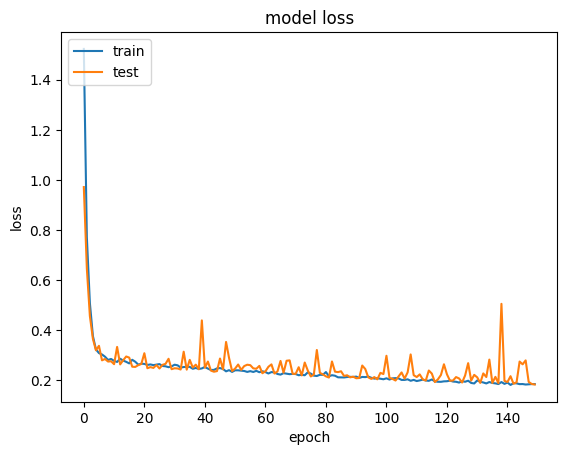

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
# Tạo một DataFrame mới với các giá trị Oxygen, PulseRate và Temperature
new_sample = pd.DataFrame({
    'Oxygen': [70],
    'PulseRate': [95],  
    'Temperature': [39]  
})

prediction = model.predict(new_sample)

# In ra xác suất bị COVID-19
print(prediction)

1/1 [==============================] - 0s 107ms/step
[[1.]]


In [11]:
model.save("predict.h5")

C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
